 # The Breast Cancer dataset contains 569 samples with 30 features, used for binary classification of whether a tumor is malignant or benign.

In [238]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline 
import seaborn as sns
from ydata_profiling import ProfileReport


from sklearn.datasets import load_breast_cancer




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import  Dropout,BatchNormalization


In [239]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()

# Create a DataFrame from the data
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target
# df_cancer['target'] = cancer.target

In [240]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [241]:
# # Generate profiling report
# profile = ProfileReport(df_cancer, title="Pandas Profiling Report", explorative=True)

# # Save the report to an HTML file
# profile.to_file("profiling_report.html")

In [242]:
df_cancer.shape

(569, 31)

In [243]:
# keys in dataset
df_cancer.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [244]:
# show info of df 
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [245]:
total_nulls = df_cancer.isnull().sum().sum()
print("Total null values in the DataFrame:", total_nulls)


Total null values in the DataFrame: 0


In [246]:
duplicate_count = df_cancer.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)


Number of duplicated rows: 0


In [247]:
descriptive_stats = df_cancer.describe()
# descriptive_stats
print("Descriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000          

In [248]:
correlation_matrix = df_cancer.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture 

In [249]:
correlation_matrix = df_cancer.corr()
correlation_matrix


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [250]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Data Visualization

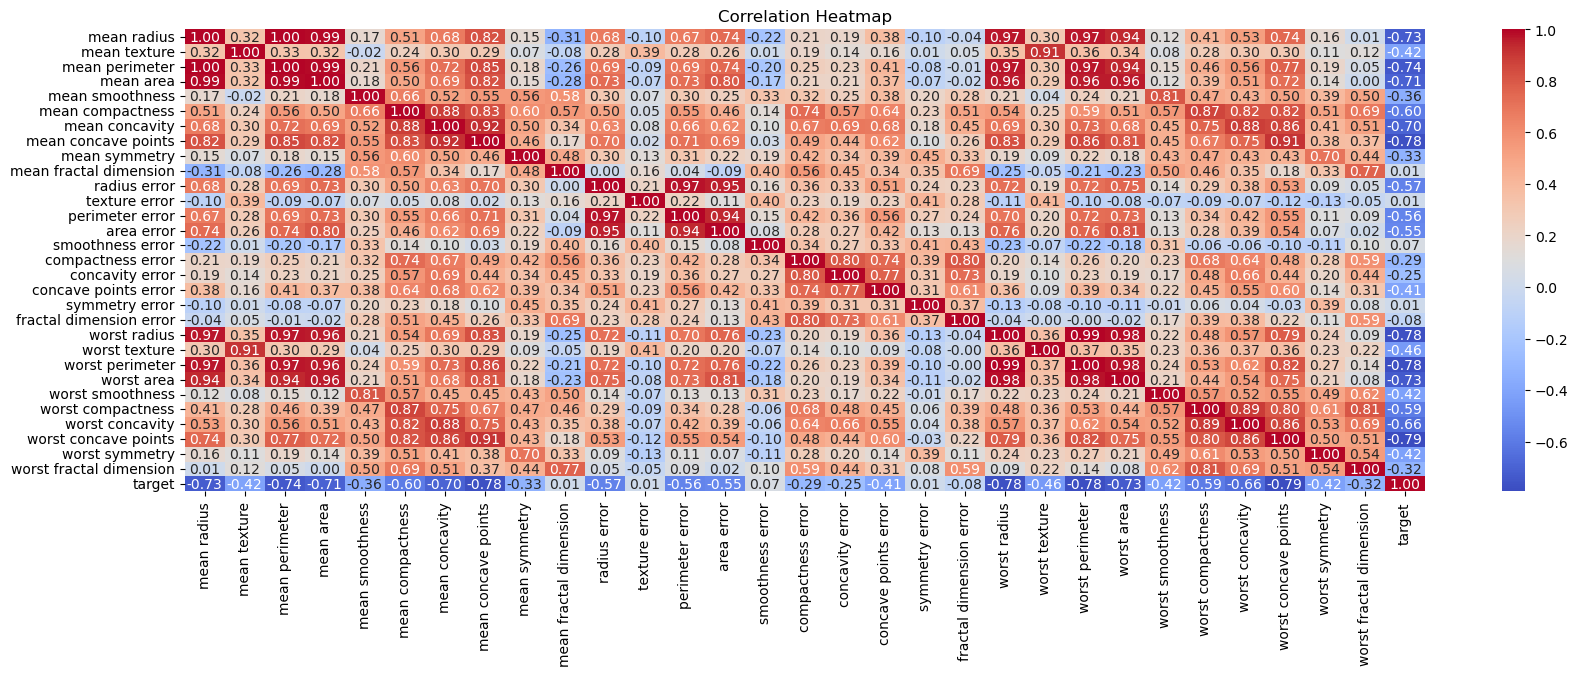

In [251]:

plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [252]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [253]:
df_cancer.shape 

(569, 31)

In [254]:
print(df_cancer)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

<h1>Basically, the pair plot is used to show the numeric distribution in the scatter plot.</h1>

In [255]:
# # Paiplot of cancer dataframe
# sns.pairplot(df_cancer, hue = 'target')
# plt.show()

c:\Users\ASUS\OneDrive\Desktop\DL\Breast Cancer\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


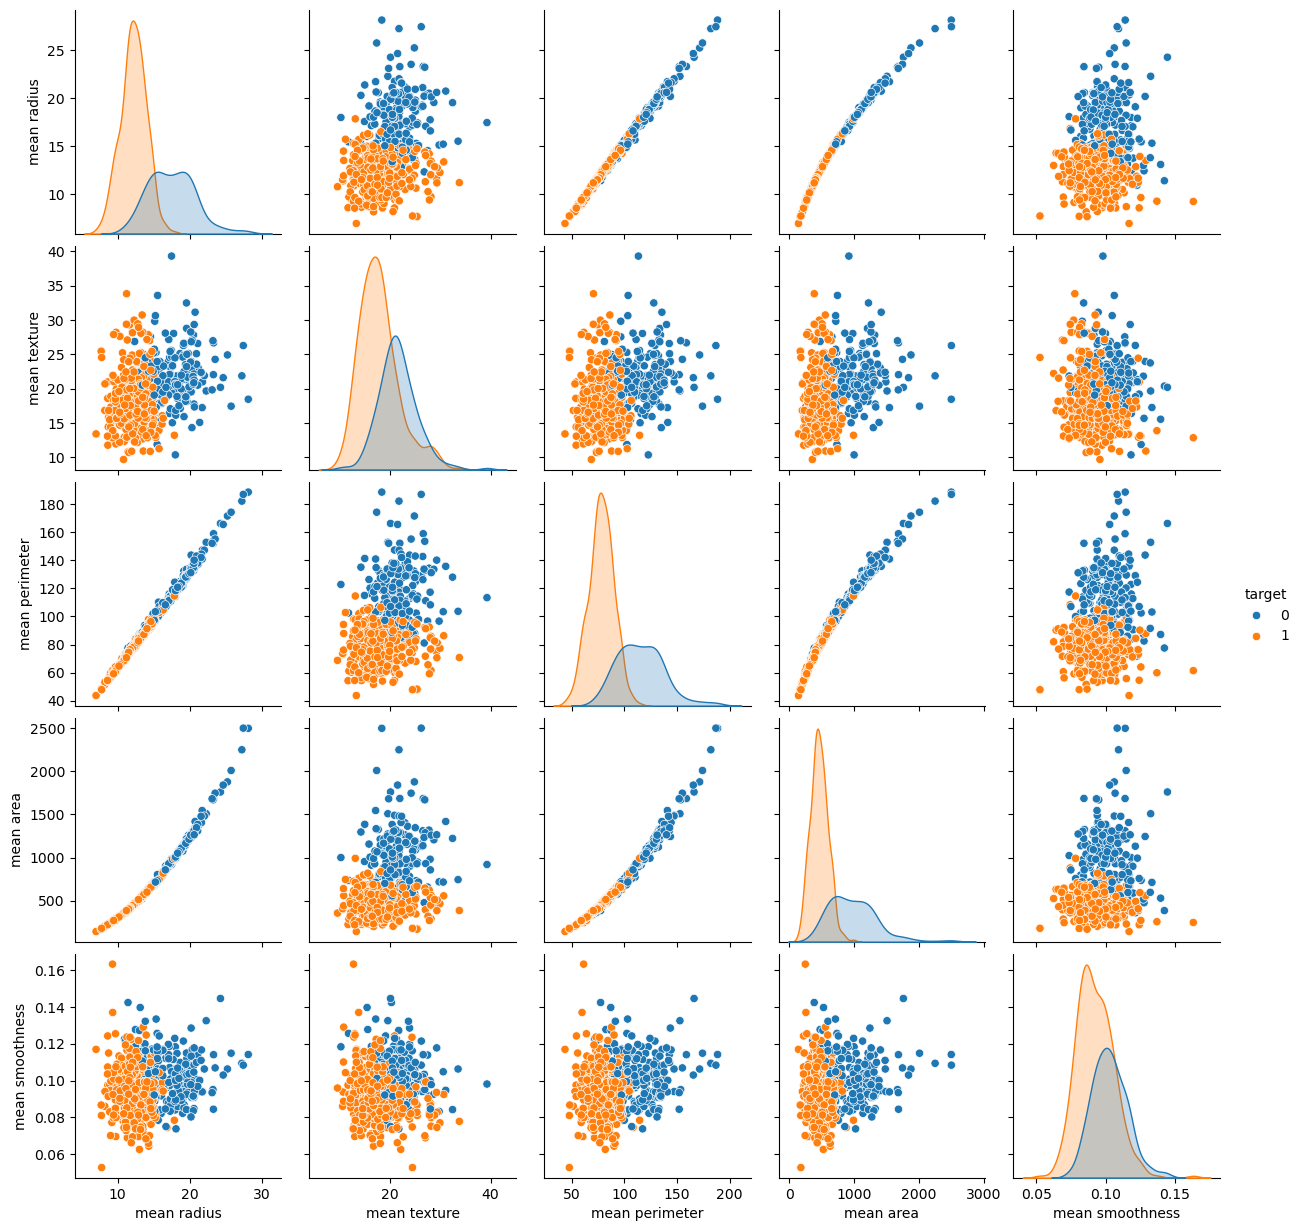

In [256]:
# pair plot of sample feature
sns.pairplot(df_cancer, hue = 'target', 
             vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

In [257]:

# Count the target class
df_cancer['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

# Counterplot

Showing the total count of malignant and benign tumor patients in counterplot.

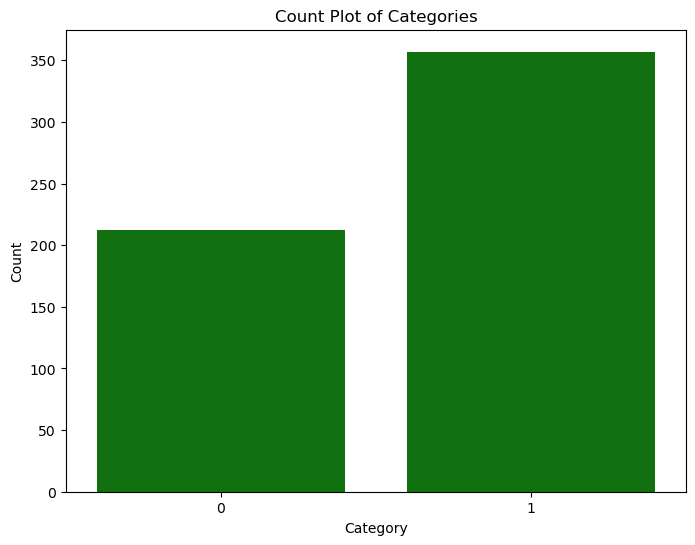

In [258]:

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cancer, x='target',color='g')
plt.title('Count Plot of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In the below counterplot max samples mean radius is equal to 1.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10468\1748262055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mean radius', data=df_cancer,palette='Set2')


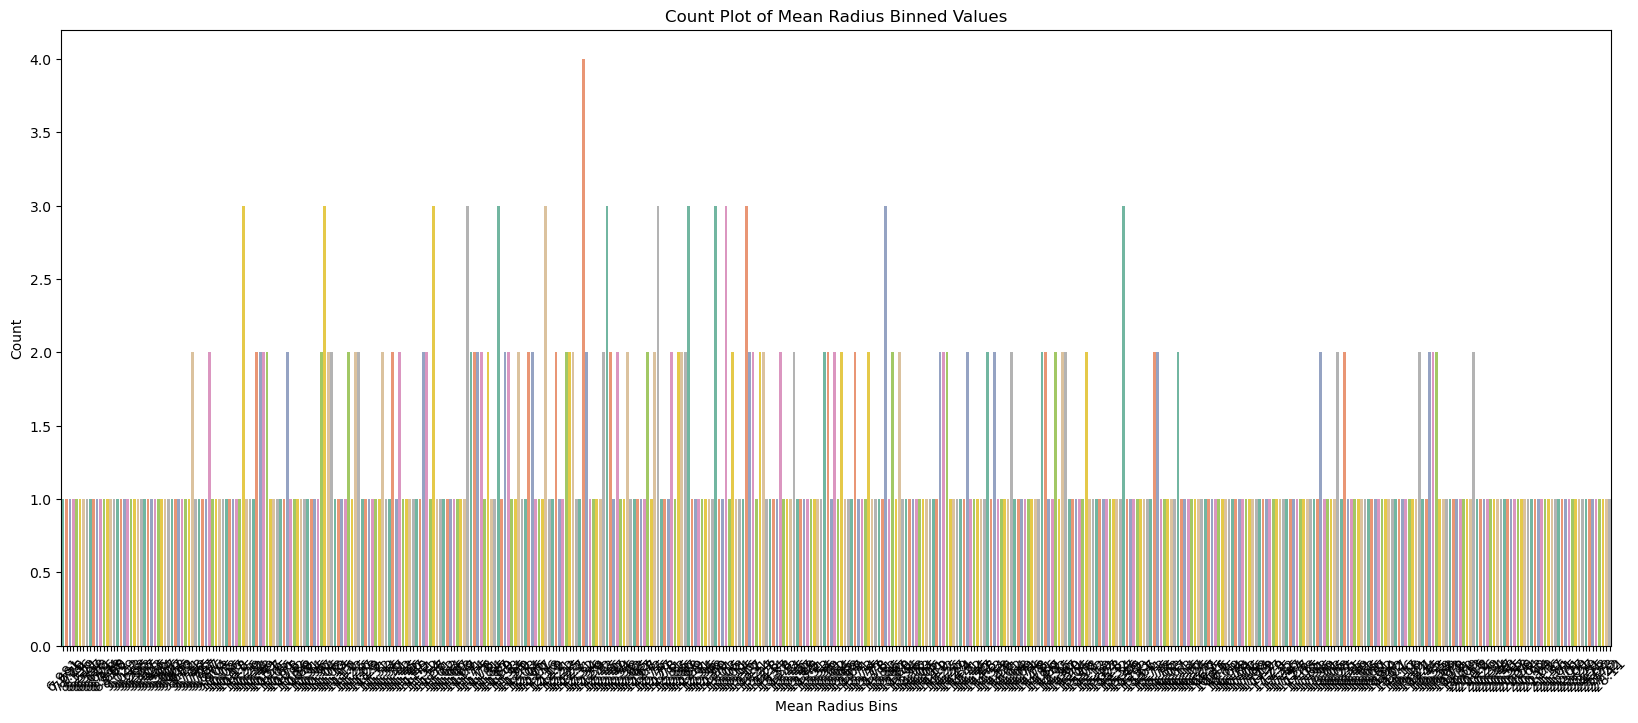

In [259]:
# Create a count plot for the binned values
plt.figure(figsize=(20, 8))
sns.countplot(x='mean radius', data=df_cancer,palette='Set2')
plt.title('Count Plot of Mean Radius Binned Values')
plt.xlabel('Mean Radius Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

Heatmap of breast cancer DataFrame

In the below heatmap we can see the variety of different feature’s value. The value of feature ‘mean area’ and ‘worst area’ are greater than other and ‘mean perimeter’, ‘area error’, and ‘worst perimeter’ value slightly less but greater than remaining features.

<Axes: >

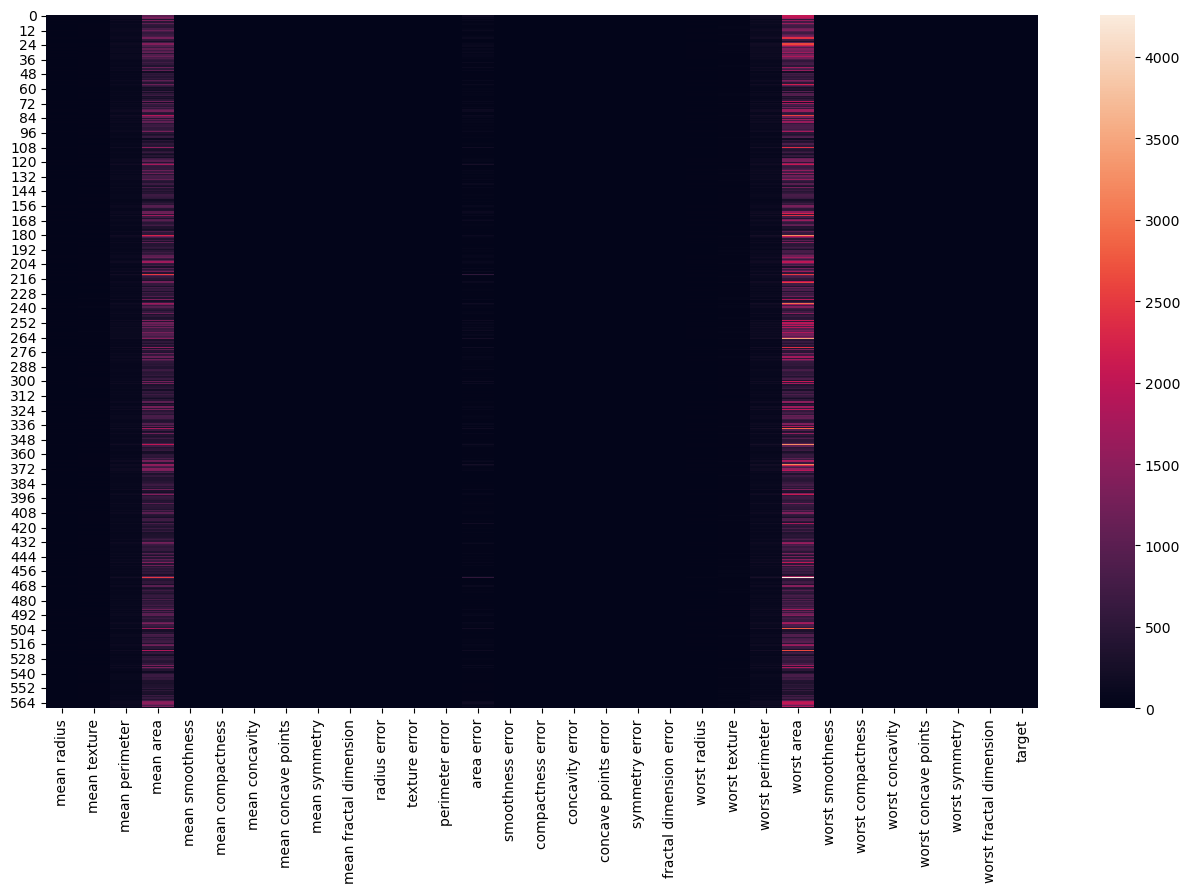

In [260]:
# heatmap of DataFrame
plt.figure(figsize=(16,9))
sns.heatmap(df_cancer)

 # Correlation barplot

Taking the correlation of each feature with the target and the visualize barplot

In [261]:
# create second DataFrame by droping target
cancer_df2 = df_cancer.drop(['target'], axis = 1)
print("The shape of 'cancer_df2' is : ", cancer_df2.shape)

The shape of 'cancer_df2' is :  (569, 30)


In [262]:
df_cancer.shape

(569, 31)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10468\1549131792.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=correlations.index, y=correlations.values,palette="viridis")


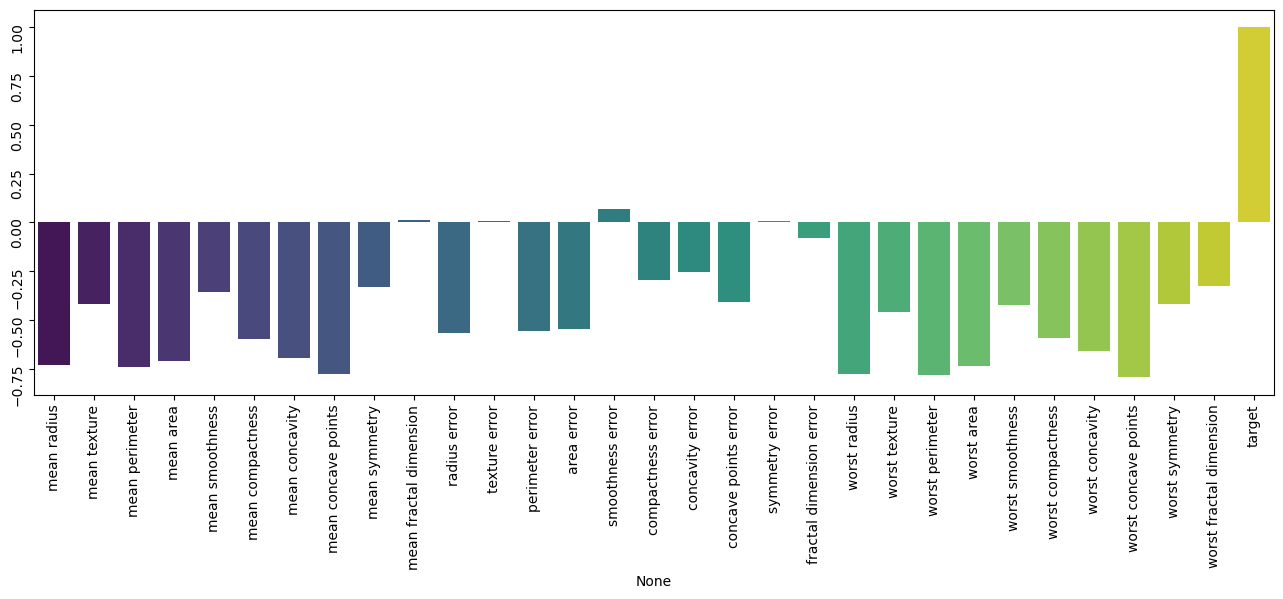

In [263]:
# visualize correlation barplot
plt.figure(figsize=(16, 5))

# Get the correlation with the target
correlations = df_cancer.corrwith(df_cancer['target'])

# Plot using seaborn's barplot with explicit x and y parameters
ax = sns.barplot(x=correlations.index, y=correlations.values,palette="viridis")

# Rotate the x labels for better visibility
ax.tick_params(labelrotation=90)

# Display the plot
plt.show()


In [264]:
df_cancer.sample(4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
412,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,...,27.99,66.61,301.0,0.1086,0.18870,0.18680,0.02564,0.2376,0.09206,1
471,12.040,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.023770,0.1854,0.05698,...,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639,1
533,20.470,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.101500,0.2166,0.05419,...,27.15,152.00,1645.0,0.1097,0.25340,0.30920,0.16130,0.3220,0.06386,0
534,10.960,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.027880,0.1619,0.06408,...,26.51,76.43,407.5,0.1428,0.25100,0.21230,0.09861,0.2289,0.08278,1


# Data Preprocessing

Split DataFrame in train and test

In [265]:

# input variable
X = df_cancer.drop(['target'], axis = 1)
X.head(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [266]:
y = df_cancer['target']
y.head(4)

0    0
1    0
2    0
3    0
Name: target, dtype: int32

In [267]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

# Feature Scaling

Converting different units and magnitude data in one unit.

In [268]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [269]:
X_train_sc

array([[-0.25014735, -0.76796585, -0.31169473, ..., -1.36032957,
        -0.38766321,  0.02350022],
       [-0.7831845 , -0.35579205, -0.79945921, ..., -0.38997167,
         0.16066118, -0.33873063],
       [ 1.16355985,  0.64991203,  1.09220769, ..., -0.31435327,
        -0.86787277, -1.01055568],
       ...,
       [ 1.11431186,  0.45677916,  1.38705669, ...,  1.32310611,
         0.62384203,  2.05821888],
       [ 0.49726342,  0.90192687,  0.59938866, ...,  1.432698  ,
         0.67322529,  2.36385116],
       [-1.21309054, -0.42645042, -1.2025599 , ..., -0.87687278,
         0.18790711, -0.54531542]])

In [270]:
X_train_sc

array([[-0.25014735, -0.76796585, -0.31169473, ..., -1.36032957,
        -0.38766321,  0.02350022],
       [-0.7831845 , -0.35579205, -0.79945921, ..., -0.38997167,
         0.16066118, -0.33873063],
       [ 1.16355985,  0.64991203,  1.09220769, ..., -0.31435327,
        -0.86787277, -1.01055568],
       ...,
       [ 1.11431186,  0.45677916,  1.38705669, ...,  1.32310611,
         0.62384203,  2.05821888],
       [ 0.49726342,  0.90192687,  0.59938866, ...,  1.432698  ,
         0.67322529,  2.36385116],
       [-1.21309054, -0.42645042, -1.2025599 , ..., -0.87687278,
         0.18790711, -0.54531542]])

 # Breast Cancer Detection using  Deep Learning Model Building


In [271]:
# Initialize the ANN
model = Sequential()

# Hidden Layers
model.add(Dense(64, activation='relu', input_shape=(30,)))  # Use input_shape instead of input
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

# Output Layer
model.add(Dense(1, activation='sigmoid'))


In [272]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 64)                1984      
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_55 (Dense)            (None, 32)                2080      
                                                                 
 dropout_27 (Dropout)        (None, 32)                0         
                                                                 
 dense_56 (Dense)            (None, 1)                 33        
                                                     

In [273]:

# Optimizer
optimizer = Adam(learning_rate=0.001)

In [274]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [275]:
# Define EarlyStopping with specific parameters
early_stopping = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    min_delta=0.01,           # Minimum change to consider an improvement
    patience=8,               # Stop training after 5 epochs without improvement
    verbose=1,                # Print messages when early stopping is triggered
    mode='auto',               # Stop when the monitored quantity stops decreasing
    baseline=0.8681,            # No baseline value; improvement is always considered
    restore_best_weights=True  # Restore weights from the best epoch
          
)

In [278]:
history = model.fit(
    X_train, y_train, 
    validation_split=0.2, 
    epochs=100, 
    batch_size=32, 
    verbose=1,callbacks=[early_stopping],
    
)


Epoch 1/100
12/12 [==============================] - 1s 29ms/step - loss: 0.6234 - accuracy: 0.6374 - val_loss: 3.1998 - val_accuracy: 0.4176
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4609 - accuracy: 0.8269 - val_loss: 2.8530 - val_accuracy: 0.4176
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3177 - accuracy: 0.8956 - val_loss: 2.1870 - val_accuracy: 0.4286
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.9203 - val_loss: 1.6638 - val_accuracy: 0.4505
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2285 - accuracy: 0.9203 - val_loss: 1.3531 - val_accuracy: 0.5275
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2133 - accuracy: 0.9176 - val_loss: 1.1322 - val_accuracy: 0.5824
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2095 - accuracy: 0.9176 - val_loss: 0.9206 - val_accuracy: 0.6374
Epoch 8/100


In [279]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


4/4 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9474
Test Loss: 0.15607409179210663
Test Accuracy: 0.9473684430122375


In [280]:
# Predict on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


4/4 [==============================] - 0s 2ms/step
Accuracy: 0.9473684210526315


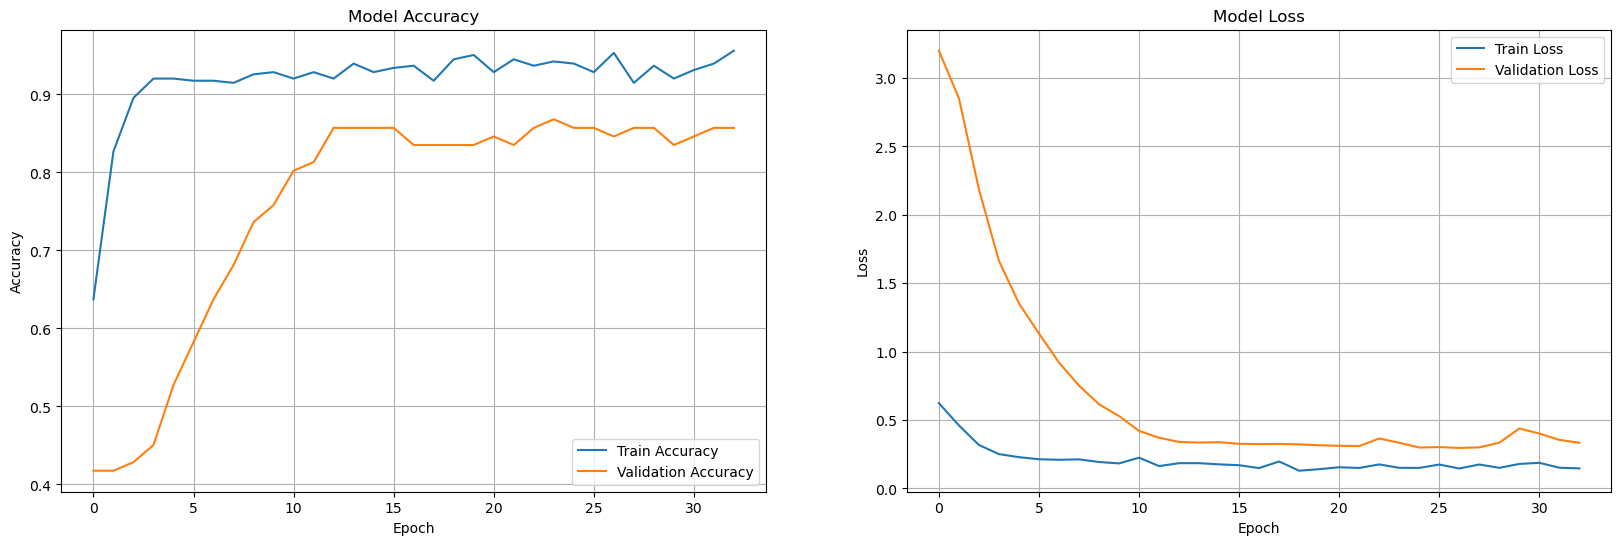

In [281]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
# Add grid

